In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/train.csv')

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [ ]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

# New Section

In [ ]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [ ]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Customer Type']=le.fit_transform(df['Customer Type'])
df['Type of Travel']=le.fit_transform(df['Type of Travel'])
df['Class']=le.fit_transform(df['Class'])
df['satisfaction']=le.fit_transform(df['satisfaction'])

In [ ]:
quant=df.quantile(q=[0.25,0.75],axis=0)
quant

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0.25,25975.75,32533.75,0.0,0.0,27.0,0.0,0.0,414.0,2.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0
0.75,77927.25,97368.25,1.0,0.0,51.0,1.0,1.0,1743.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0,1.0


In [ ]:
df['Customer Type']=np.where(df['Customer Type']>0.1,0,df['Customer Type'])
df['Customer Type']=np.where(df['Customer Type']<0,0,df['Customer Type'])

df['Flight Distance']=np.where(df['Flight Distance']>3700,1744,df['Flight Distance'])
df['Flight Distance']=np.where(df['Flight Distance']<0,414,df['Flight Distance'])

df['Checkin service']=np.where(df['Checkin service']>4.9,4.0,df['Checkin service'])
df['Checkin service']=np.where(df['Checkin service']<2,3.0,df['Checkin service'])

df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] > 10, 12, df['Departure Delay in Minutes'])
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] < 0, 3.0, df['Departure Delay in Minutes'])

df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] < 10, 13, df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] < 0, 3.0, df['Arrival Delay in Minutes'])



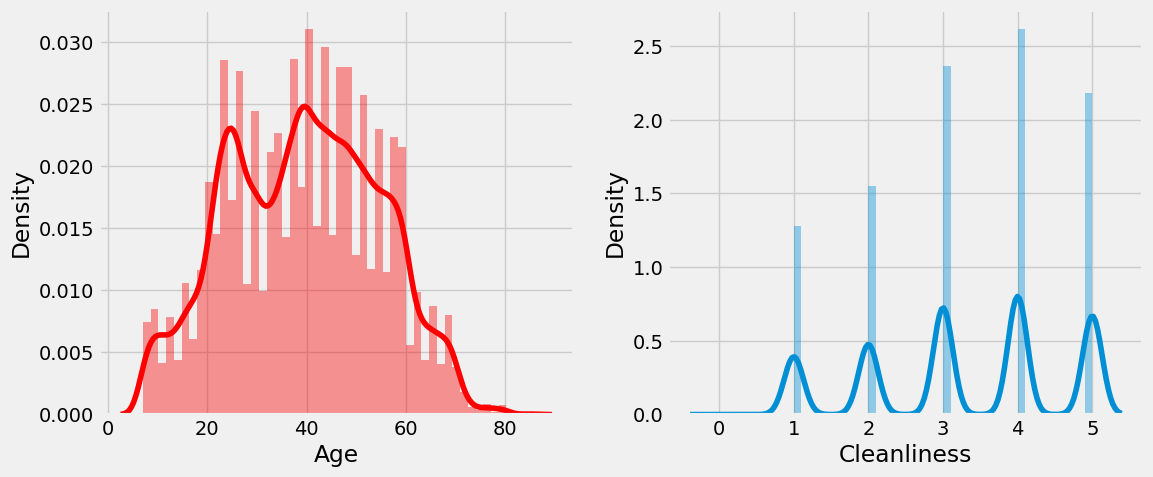

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['Age'],color='r')
plt.subplot(122)
sns.distplot(df['Cleanliness'])
plt.show()

<Axes: ylabel='count'>

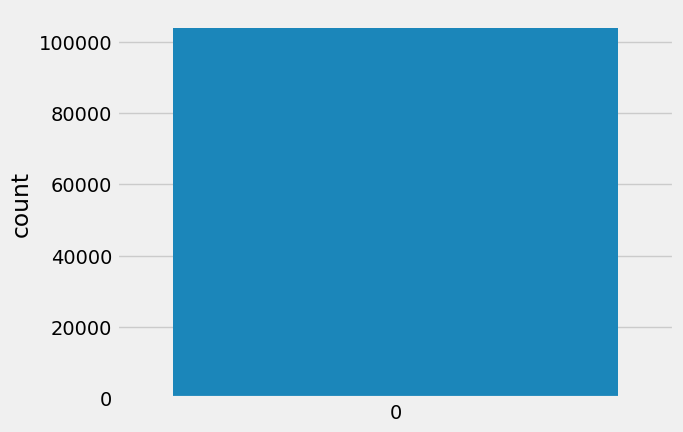

In [ ]:
sns.countplot(df['satisfaction'])

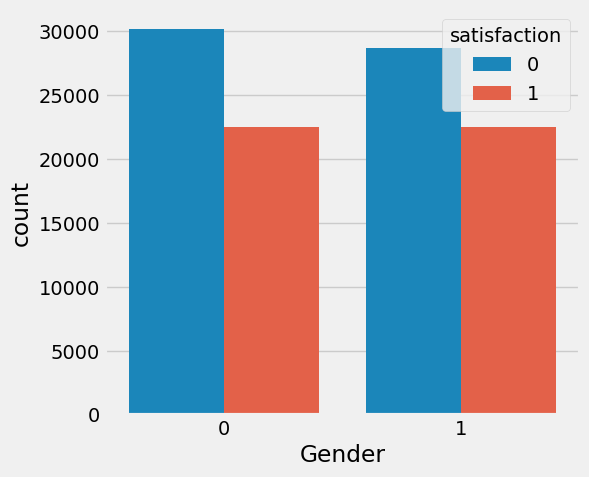

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Gender', hue='satisfaction', data=df)

plt.show()

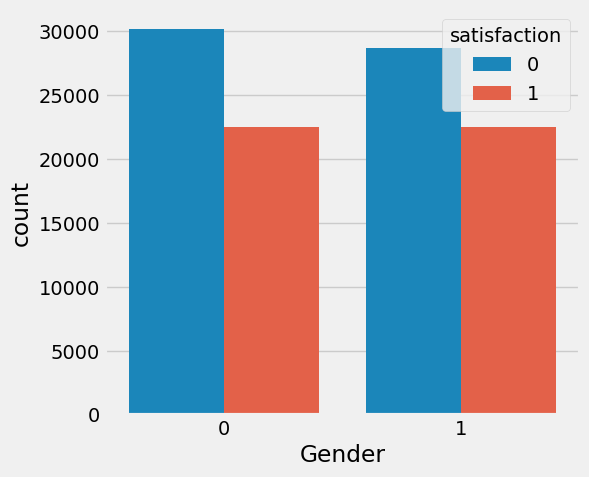

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Gender', hue='satisfaction', data=df)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.swarmplot(x='satisfaction', y='Age', data=df, hue='CategoricalVariable')
plt.show()


NameError: ignored

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(X,df['satisfaction'],test_size=0.2,random_state=42)

SyntaxError: ignored

In [ ]:
X_train.shape,y_train.shape

NameError: ignored

In [ ]:
x_test.shape,y_test.shape

NameError: ignored

In [ ]:
def RF(X_train,y_train,X_test,y_test):
   reg4 = RandomForestClassifier()
   reg4.fit(X_train,y_train)
   print('Accuracy:')
   print('Training accuracy=',reg4.score(X_train,y_train))
   print('Test accuracy=',reg4.score(X_train,y_test))
   y_test_pred=reg4.predict(_test)
   print('Test data confusion_matrix:',confusion_matrix(y_test,y_test_pred))
   print('Test data classification_report:',classification_report(y_test,y_test_pred))

In [ ]:
df.column


NameError: ignored

In [ ]:
def knn(X_train,y_train,X_test,y_test):
  reg=KNeighborsClassifier(n_neighbors=5)
  reg.fit(X_train,y_train)
  print('Accuracy:')
  print('Training accuracy=',reg.score(X_train,y_train))
  print('Test accuracy=',reg.score(X_test,y_test))
  y_test_pred=reg.predict(X_test)
  print('Test data confusion_matrix:',confusion_matrix(y_test,y_test_pred))
  print('Test data classification_report:',classification_report(y_test,y_test_pred))




In [ ]:
def lg(X_train,X_test,y_test):
  reg1=LogisticRegression()
  reg.fit(X_train,y_train)
  print('accuracy:')
  print('Training accuracy=',reg1.score(X_train,y_train))
  print('Test accuracy=',reg1.score(X_test,y_test))
  y_test_pred=reg.predict(X_test)
  print('Test data confusion_matrix:',confusion_matrix(y_test,y_test_pred))
  print('Test data classification_report:',classification_report(y_test,y_test_pred))

In [ ]:
 Airline.predict([[1,2,1,3,1,0,7,5,0,1,1,1,1,1,1,1,1,1,1,1,1]])



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [ ]:
parameters = {
    'n_estimators':[25,50,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[14,20,25,30]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=forest,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

print('best accuracy=', grid_search.best_score_)
print('best_parameters=', grid_search.best_params_)


In [ ]:
random= RandomForestClassifier(criterion='gini',max_depth=30,n_estimators=200)
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

In [ ]:
acc= accuracy_score(y_test,y_pred)
acc